Clasificación en datasets con Machine Learning
Exactitud del modelo: 0.90
Modelo creado con Exactitud de predicción: 0.895
Estadísticas del modelo
Matriz de Confusión:
Figure(640x480)
Reporte de Clasificación:
              precision    recall  f1-score  support
0              0.875000  0.903226  0.888889   93.000
1              0.913462  0.887850  0.900474  107.000
accuracy       0.895000  0.895000  0.895000    0.895
macro avg      0.894231  0.895538  0.894681  200.000
weighted avg   0.895577  0.895000  0.895087  200.000
Métricas principales
Precisión (Precision): 0.90
Sensibilidad (Recall): 0.90
F1 Score (f1_score): 0.90
Métricas AUC-ROC
AUC-ROC: 0.973


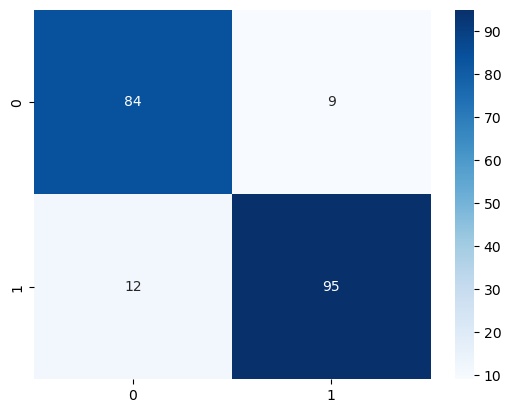

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #para crear mostrar los resultados en graficos
import seaborn as sns #libreria para crear graficos sofisticados como la matriz de confusion.
import joblib  # Para guardar y cargar modelos. es una librería optimizada para serializar objetos de Python,
#especialmente aquellos que contienen grandes arrays numéricos (como los modelos de machine learning)

#from sklearn.datasets import load_iris
#from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
#from sklearn.ensemble import RandomForestClassifier #metodo de ensamblado que combina multiples arboles de decision.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Título de la aplicación
print('Clasificación en datasets con Machine Learning')

#cargar el dataset
#data = load_breast_cancer()
X, y = make_classification(n_samples=1000, n_features=20, n_informative=1, n_classes=2, n_clusters_per_class=1, random_state=42) #2*n_informative >= n_classes*n_clusters
data = [X, y]

def createModel(data):    
    
    # Convertir a un DataFrame de pandas para mejor visualización
    #df = pd.DataFrame(data.data, columns=data.feature_names)
    #df['target'] = data.target
    
    #st.write("Datos cargados:")
    #print(df.head())    

    # Asumiendo que la última columna es la etiqueta y el resto son características
    X = data[0] #data.data #df.iloc[:, :-1] # Características
    y = data[1] #data.target #df.iloc[:, -1] # Etiqueta

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar el modelo
    #model = RandomForestClassifier(n_estimators=100, random_state=42) #n_estimators es la cantidad de arboles de decision, por defecto 100
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones y mostrar precisión
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Exactitud del modelo: {accuracy:.2f}')

    y_proba = model.predict_proba(X_test)  # Obtener las probabilidades para cada clase

    joblib.dump(model, 'model_trainer.pkl', compress=4)  # Nivel de compresión (0-9))

    data = [y_test, y_pred, data, y_proba]

    print('Modelo creado con Exactitud de predicción: ' + str(accuracy))

    return data

def readModel():
    try:
        model = joblib.load('model_trainer.pkl')
        #st.write("Modelo cargado correctamente.")
        print("Modelo cargado correctamente.")
    except FileNotFoundError:
        #st.write("No se encontró un modelo guardado. Entrena y guarda un modelo primero.")
        print("No se encontró un modelo guardado. Entrena y guarda un modelo primero.")
    return model

data = createModel(data)

# Sección 2: Visualizar estadísticas del modelo
print('Estadísticas del modelo')

#Mostrar matriz de confusión
print('Matriz de Confusión:')
cm = confusion_matrix(data[0], data[1])
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
print(fig)

#Mostrar reporte de clasificación
print('Reporte de Clasificación:')
report = classification_report(data[0], data[1], output_dict=True)
print(pd.DataFrame(report).transpose())

# Calcula el AUC-ROC
y_proba = data[3]
# Convertir las etiquetas a formato "one-hot encoded" (requerido por roc_auc_score en multiclase)
classes = np.unique(data[0])  # Determinar las clases únicas
y_test_binarized = label_binarize(data[0], classes=classes)  # Binarizar las etiquetas verdaderas

#calculo de AUC-ROC para clasificacion binaria
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(data[0], y_proba[:, 1])

# Calcular el AUC-ROC
auc_roc = roc_auc_score(data[0], y_proba[:, 1])  # Para la clase positiva

# Calcular el AUC-ROC en modo multiclase (One-vs-Rest o One-vs-One)
#auc_roc_ovr = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')  # One-vs-Rest --> solo para clasificacion multiclase
#auc_roc_ovo = roc_auc_score(y_test_binarized, y_proba, multi_class='ovo')  # One-vs-One --> solo para clasificacion multiclase

# # Mostrar métricas principales
print('Métricas principales')
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1 Score (f1_score): {f1_score:.2f}")
# Mostrar resultados en Streamlit
print('Métricas AUC-ROC')
#print(f"AUC-ROC (One-vs-Rest): {auc_roc_ovr:.2f}") #muestra el AUC-ROC para clasificacion multiclase
#print(f"AUC-ROC (One-vs-One): {auc_roc_ovo:.2f}") #muestra el AUC-ROC para clasificacion multiclase
print(f"AUC-ROC: {auc_roc:.3f}") #muestra el AUC-ROC para clasificacion binaria
#****************************************************************************************

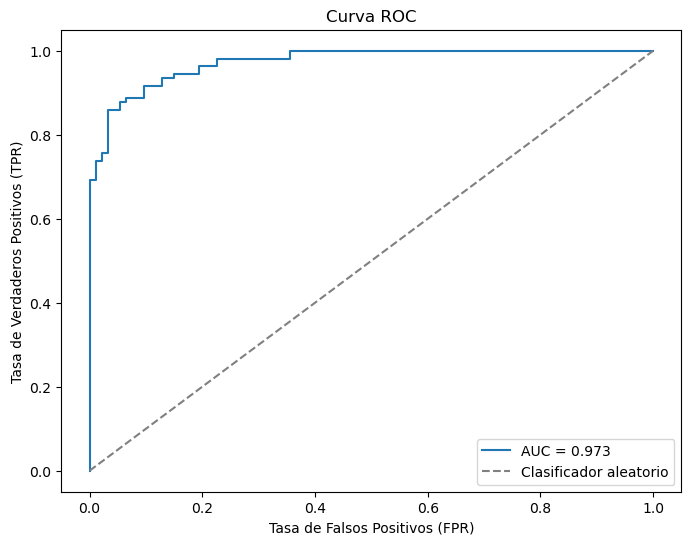

In [7]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Clasificador aleatorio")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [11]:
from sklearn import datasets

# Obtener la lista de datasets disponibles en sklearn
available_datasets = dir(datasets)

# Filtrar solo los que comienzan con "load_" o "fetch_"
#dataset_list = [d for d in available_datasets if d.startswith("load_") or d.startswith("fetch_")]

# Mostrar la lista de datasets
print("Datasets disponibles en sklearn:")
for d in available_datasets:
    print(d)

Datasets disponibles en sklearn:
__all__
__builtins__
__cached__
__doc__
__file__
__getattr__
__loader__
__name__
__package__
__path__
__spec__
_arff_parser
_base
_california_housing
_covtype
_kddcup99
_lfw
_olivetti_faces
_openml
_rcv1
_samples_generator
_species_distributions
_svmlight_format_fast
_svmlight_format_io
_twenty_newsgroups
clear_data_home
dump_svmlight_file
fetch_20newsgroups
fetch_20newsgroups_vectorized
fetch_california_housing
fetch_covtype
fetch_kddcup99
fetch_lfw_pairs
fetch_lfw_people
fetch_olivetti_faces
fetch_openml
fetch_rcv1
fetch_species_distributions
get_data_home
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine
make_biclusters
make_blobs
make_checkerboard
make_circles
make_classification
make_friedman1
make_friedman2
make_friedman3
make_gaussian_quantiles
make_hastie_10_2
make_low_rank_matrix
make_moons
make_multilabel_classification
make_regr